<a href="https://colab.research.google.com/github/IlhamThrq/AI_TI-1B_2025/blob/main/Supervise%20Learning%20Regression%20dan%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 8 - Supervise Learning Regression dan Classification


## Import Library

In [50]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Latihan 1 - Decision Tree

In [4]:
# Membaca file iris.csv
iris = pd.read_csv('Iris.csv')

# Melihat informasi dataset
iris.info()

# Melihat informasi dataset pada 5 baris pertama
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Menghilangkan kolom yang tidak penting
iris.drop('Id', axis=1, inplace=True)

In [6]:
# Memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [8]:
# Evaluasi Model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

Accuracy:  0.933


In [9]:
# Prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]]) [0])

Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    rounded=True,
    filled=True
)

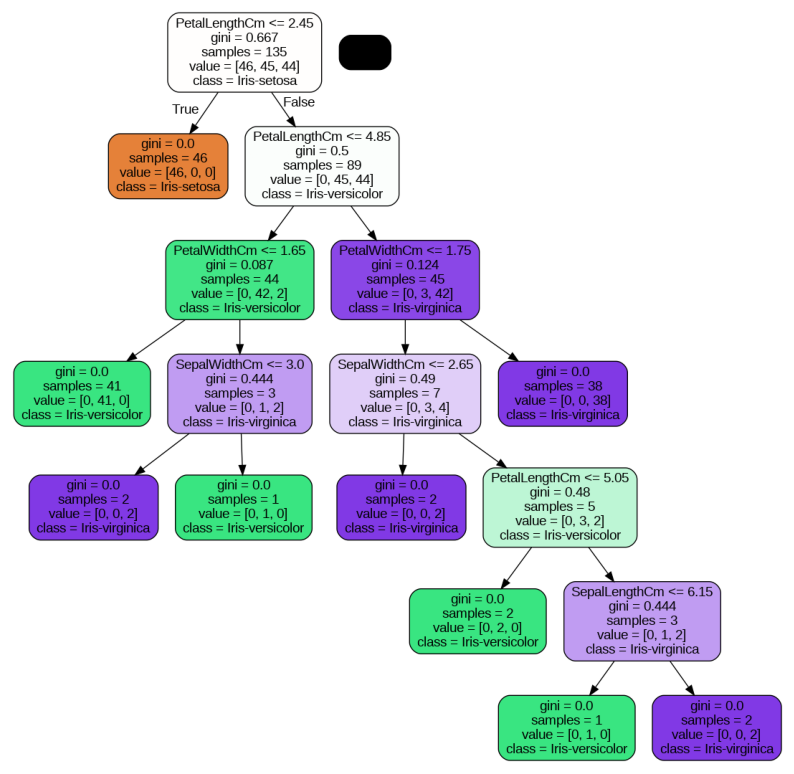

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz
import pydotplus

# Ekspor model ke .dot
export_graphviz(
    tree_model,
    out_file="iris_tree.dot",
    feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    rounded=True,
    filled=True
)

# Konversi .dot ke PNG
with open("iris_tree.dot") as f:
    dot_data = f.read()

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("iris_tree.png")  # Simpan ke .png

# Tampilkan gambar
img = mpimg.imread("iris_tree.png")
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


# Latihan 2 - Linear Regression

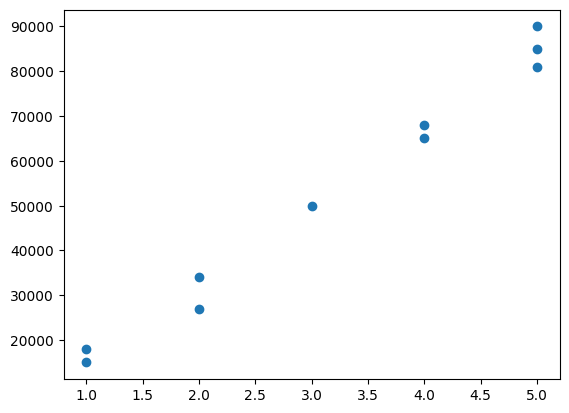

In [29]:
# buat data jumlah kamar
bedrooms = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 5])

# data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])
%matplotlib inline

plt.scatter(bedrooms, house_price)

Jumlah kamar: 6
Prediksi harga kamar: 102110.16949152542

Jumlah kamar: 7
Prediksi harga kamar: 119542.37288135593



1.0

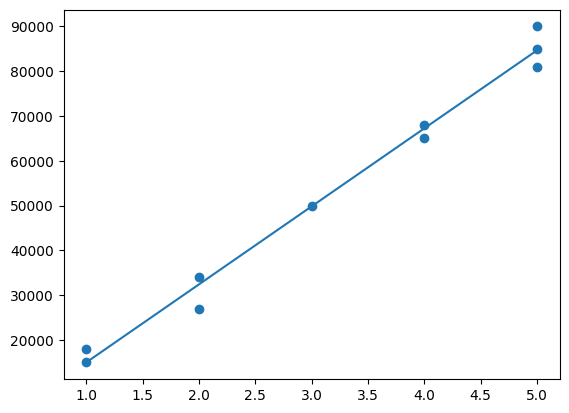

In [38]:
# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

# Menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

# Data testing
# Jumlah kamar yang ingin diprediksi harganya
X_test = np.array([[6], [7]])

# Melakukan prediksi harga kamar
y_pred = linreg.predict(X_test)

# Menampilkan hasil prediksi
for i in range(len(X_test)):
    print("Jumlah kamar:", X_test[i][0])
    print("Prediksi harga kamar:", y_pred[i])
    print()

# Uji akurasi model
linreg.score(X_test, y_pred)

# Latihan 3 - Logistic Regression

In [42]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [45]:
# drop kolom yang tidak diperlukan
data = df.drop(columns=['User ID'])

# Jalankan proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data)
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,False,True
1,35,20000,0,False,True
2,26,43000,0,True,False
3,27,57000,0,True,False
4,19,76000,0,False,True
...,...,...,...,...,...
395,46,41000,1,True,False
396,51,23000,1,False,True
397,50,20000,1,True,False
398,36,33000,0,False,True


In [46]:
# pisahkan atribut dan label
predictions = ['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']
X = data[predictions]
y = data['Purchased']

In [47]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
scaled_data = pd.DataFrame(scaled_data, columns=X.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [48]:
# bagi data menjadi train dan test untuk setiap atribut dan label
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=1)

In [51]:
# latih model dengan fungsi fit
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
# Uji akurasi model
model.score(X_test, y_test)

0.825

# TUGAS PRAKTIKUM

### 1.	Buatlah model maching learning untuk memprediksi calon konsumen melakukan transaksi atau tidak.


Decision Tree Classifier Performance:
Accuracy: 82.50%
Confusion Matrix (angka):
[[49  7]
 [ 7 17]]


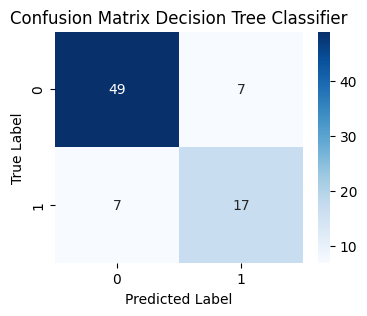

<ipython-input-60-44ac42c4a0f0>:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
<ipython-input-60-44ac42c4a0f0>:79: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


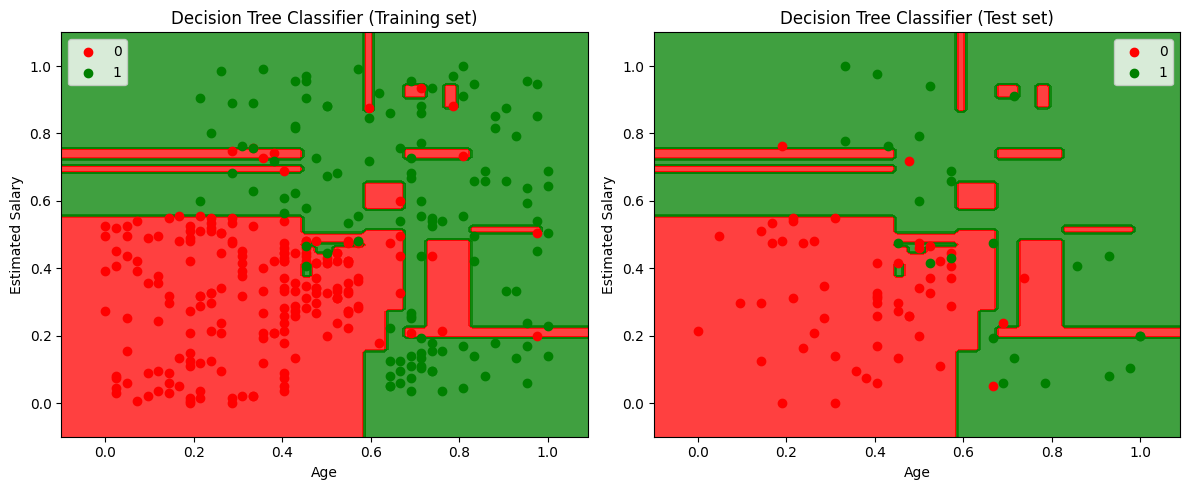

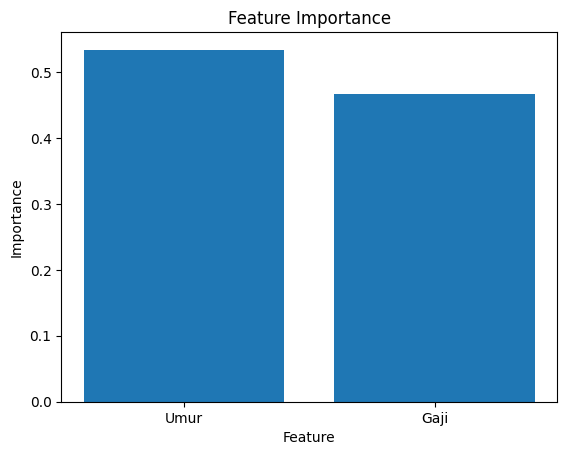


Logistic Regression Performance:
Accuracy: 85.00%
Confusion Matrix (angka):
[[54  2]
 [10 14]]


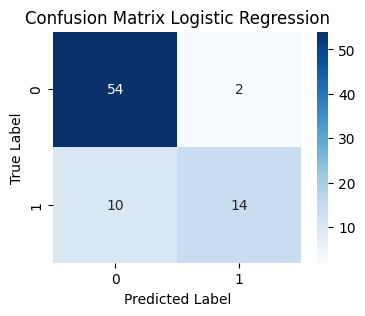

<ipython-input-60-44ac42c4a0f0>:62: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
<ipython-input-60-44ac42c4a0f0>:79: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


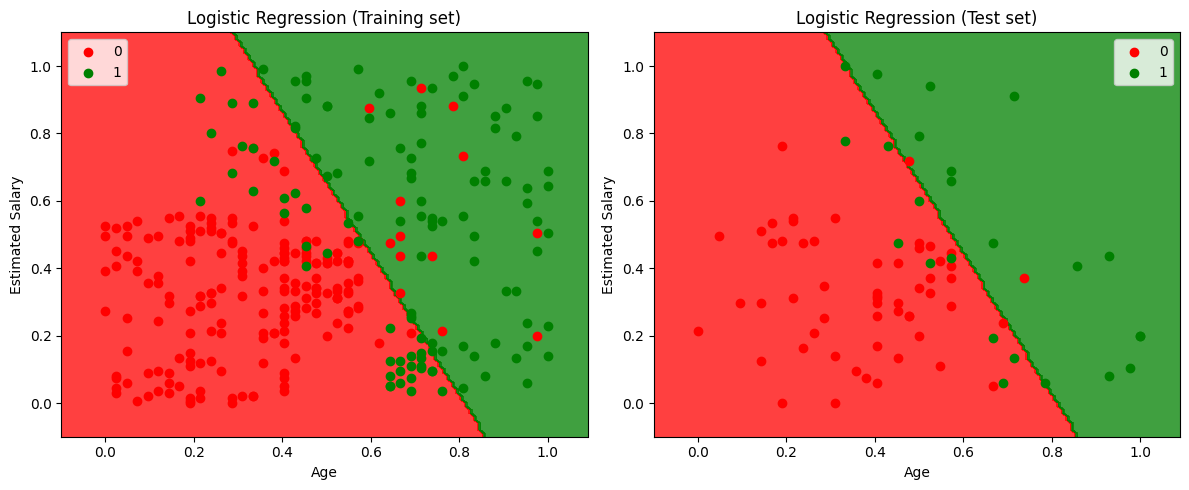

In [60]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns

# Load dataset
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')

# Feature & label
X = dataset.iloc[:, 2:-1].values  # Asumsi: 2 kolom fitur
y = dataset.iloc[:, -1].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Normalize features
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fungsi plot confusion matrix heatmap
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Fungsi plot feature importance (khusus Decision Tree)
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        plt.bar(feature_names, importances)
        plt.title('Feature Importance')
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.show()

# Fungsi visualisasi decision region, training & test
def plot_decision_region(model, X_train, y_train, X_test, y_test, model_name):
    plt.figure(figsize=(12, 5))

    # Plot Training
    plt.subplot(1,2,1)
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-0.1, stop=X_set[:,0].max()+0.1, step=0.01),
                         np.arange(start=X_set[:,1].min()-0.1, stop=X_set[:,1].max()+0.1, step=0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(f'{model_name} (Training set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()

    # Plot Test
    plt.subplot(1,2,2)
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-0.1, stop=X_set[:,0].max()+0.1, step=0.01),
                         np.arange(start=X_set[:,1].min()-0.1, stop=X_set[:,1].max()+0.1, step=0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(f'{model_name} (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Gabungan fungsi train, evaluasi, visualisasi
def train_and_evaluate_full(model, model_name, feature_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {acc*100:.2f}%")
    print("Confusion Matrix (angka):")
    print(confusion_matrix(y_test, y_pred))

    # Plot heatmap confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)
    # Plot decision region
    plot_decision_region(model, X_train, y_train, X_test, y_test, model_name)
    # Feature importance (khusus Decision Tree)
    plot_feature_importance(model, feature_names)

# Nama fitur (edit jika nama kolom berbeda)
feature_names = list(dataset.columns[2:-1])

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=99)
train_and_evaluate_full(dt_classifier, "Decision Tree Classifier", feature_names)

# Logistic Regression
lr_classifier = LogisticRegression(random_state=99)
train_and_evaluate_full(lr_classifier, "Logistic Regression", feature_names)


### 2.	Buatlah model maching learning untuk memprediksi gaji pegawai berdasarkan masa kerjanya

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tahun_Pengalaman  30 non-null     float64
 1   Gaji              30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes
None

Descriptive Statistics:
       Tahun_Pengalaman          Gaji
count         30.000000  3.000000e+01
mean           5.313333  1.140045e+09
std            2.837888  4.112164e+08
min            1.100000  5.659650e+08
25%            3.200000  8.508112e+08
50%            4.700000  9.785550e+08
75%            7.700000  1.508171e+09
max           10.500000  1.835865e+09


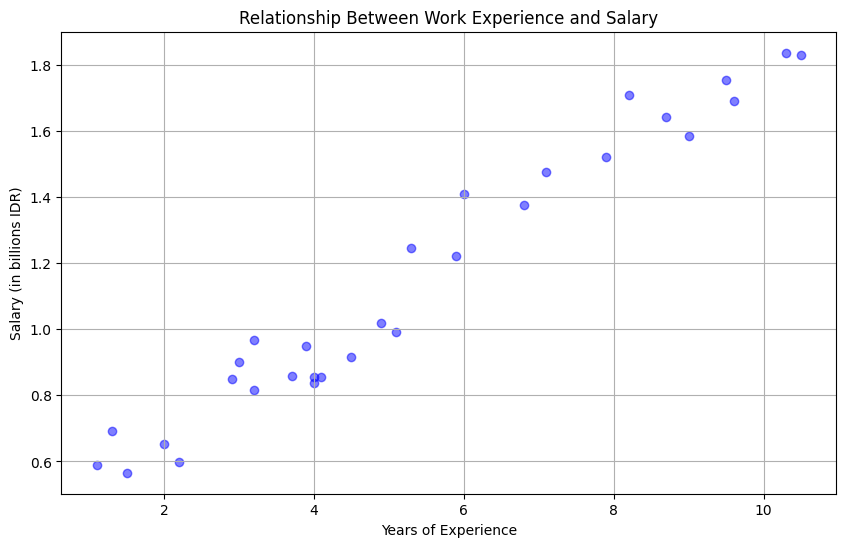


Model Evaluation:
Coefficient (slope): 141357229.85
Intercept: 379823745.18
Mean Squared Error (MSE): 11211771792579374.00
R-squared (R²): 0.9024


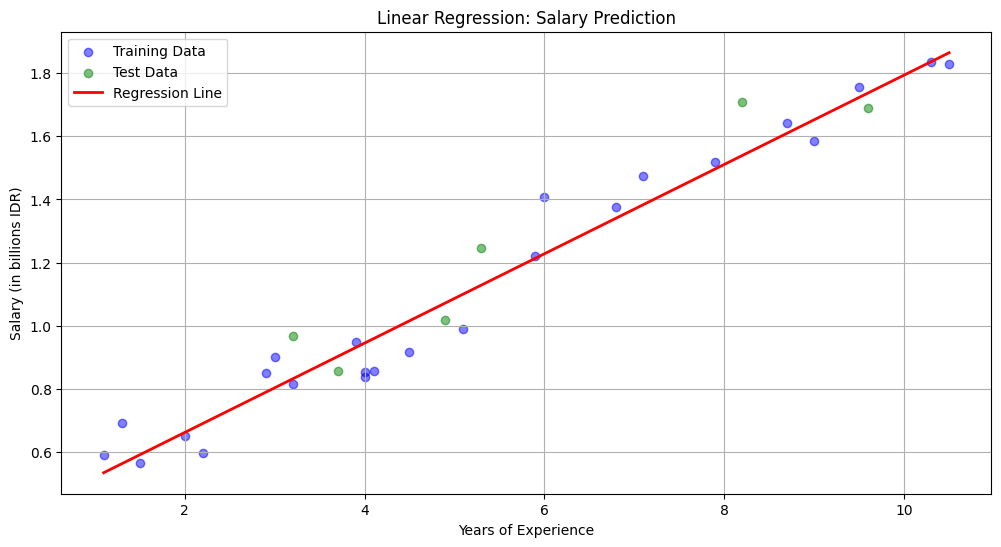


Salary Predictions for New Experience Values:
2.5 years: Rp 733.22 million
5.5 years: Rp 1157.29 million
8.0 years: Rp 1510.68 million
11.0 years: Rp 1934.75 million


In [56]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('Data_Gaji.csv', delimiter=';')

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

# Visualize the relationship between work experience and salary
plt.figure(figsize=(10, 6))
plt.scatter(data['Tahun_Pengalaman'], data['Gaji']/1e9, color='blue', alpha=0.5)
plt.title('Relationship Between Work Experience and Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in billions IDR)')
plt.grid(True)
plt.show()

# Prepare data for modeling
X = data['Tahun_Pengalaman'].values.reshape(-1, 1)  # Features (2D array)
y = data['Gaji'].values  # Target

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize the regression line and predictions
plt.figure(figsize=(12, 6))

# Plot training data
plt.scatter(X_train, y_train/1e9, color='blue', label='Training Data', alpha=0.5)

# Plot test data
plt.scatter(X_test, y_test/1e9, color='green', label='Test Data', alpha=0.5)

# Plot regression line
regression_line = model.predict(X)
plt.plot(X, regression_line/1e9, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in billions IDR)')
plt.legend()
plt.grid(True)
plt.show()

# Predict salary for new experience values
new_experiences = np.array([[2.5], [5.5], [8.0], [11.0]])
predicted_salaries = model.predict(new_experiences)

print("\nSalary Predictions for New Experience Values:")
for exp, salary in zip(new_experiences, predicted_salaries):
    print(f"{exp[0]} years: Rp {salary/1e6:.2f} million")

### Parameter Tuning

1. Parameter Tuning untuk Decision Tree

In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler # Added MinMaxScaler as used later in the notebook

try:
    # Adjusted delimiter based on previous parts of the notebook
    data_clf = pd.read_csv('iklan_sosmed.csv', delimiter=';')
    # Prepare data for modeling (Using Age and Estimated Salary as features, Purchased as target)
    # Ensure these column names match your actual CSV file after checking dataset.info()
    X_clf = data_clf[['Umur', 'Gaji']].values #
    y_clf = data_clf['Transaksi'].values

    # Split data into training (80%) and test (20%) sets (Using parameters from notebook section 1 & 3)
    X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
        X_clf, y_clf, test_size=0.2, random_state=99, stratify=y_clf # Use stratify for classification
    )

    # Normalize features using MinMaxScaler (As used in notebook section 1 & 3)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_clf)
    X_test_scaled = scaler.transform(X_test_clf)

    # Use the scaled data for tuning
    X_train = X_train_scaled
    y_train = y_train_clf

    print("Data loaded and split successfully for classification.")

except Exception as e:
    print(f"Error loading or preparing data for classification: {e}")
    # Exit or handle the error appropriately if data loading fails
    # For now, we'll print the error and stop execution
    exit()

# --- End of Data Loading and Splitting ---


# 1. Cek distribusi kelas
# Use the y_train defined from the classification data loading step
class_dist = Counter(y_train)
print("Class distribution (Training Set):", class_dist)

# 2. Tentukan jumlah fold aman
min_samples = min(class_dist.values())
# Ensure n_splits is not more than the number of samples in the smallest class
# and also not more than the total number of samples
n_splits = min(5, min_samples) if min_samples >= 2 else 2
if n_splits < 2:
     print("Warning: Minimum class samples less than 2. Cannot perform StratifiedKFold.")
     print("Skipping GridSearch and using a simple cross_val_score with 2 folds.")
     # Fallback logic for insufficient samples
     base_dt = DecisionTreeClassifier(max_depth=5, random_state=99)
     # Use a simple KFold if StratifiedKFold is not possible (careful with imbalance)
     # Or just train and evaluate directly without cross-validation if very few samples
     if len(X_train) >= 2 * 2: # Check if at least 2 samples in each of 2 hypothetical folds
        from sklearn.model_selection import KFold
        simple_cv = KFold(n_splits=min(2, len(X_train)))
        scores = cross_val_score(base_dt, X_train, y_train, cv=simple_cv, scoring='accuracy')
        print("Simple CV Accuracy (2 folds): {:.2f}%".format(scores.mean()*100))
     else:
        print("Not enough samples for cross-validation. Cannot proceed with tuning.")
else:
    print(f"Using {n_splits}-fold StratifiedKFold for CV")

    # 3. Gunakan StratifiedKFold
    # Use StratifiedKFold as it's classification and you checked class distribution
    cv_strategy = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=99)

    # 4. Parameter grid untuk Decision Tree (disederhanakan)
    dt_params = {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

    # 5. GridSearchCV dengan error handling
    try:
        # Use the correctly defined X_train and y_train
        dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=99),
                             param_grid=dt_params,
                             cv=cv_strategy,
                             scoring='accuracy',
                             n_jobs=-1)
        dt_grid.fit(X_train, y_train) # Fit using the training data

        print("\nBest Decision Tree Parameters:", dt_grid.best_params_)
        print("Best CV Accuracy: {:.2f}%".format(dt_grid.best_score_*100))

        # Optional: Evaluate best model on the test set
        # Need y_test_clf from the split
        from sklearn.metrics import accuracy_score
        best_dt_model = dt_grid.best_estimator_
        y_pred_test = best_dt_model.predict(X_test_scaled) # Use the scaled test data
        test_accuracy = accuracy_score(y_test_clf, y_pred_test)
        print("Test Set Accuracy with Best Model: {:.2f}%".format(test_accuracy * 100))


    except ValueError as e:
        print("Error during GridSearch:", e)
        print("\nFallback to simpler validation:")
        # Fallback using cross_val_score if GridSearchCV fails
        base_dt = DecisionTreeClassifier(max_depth=5, random_state=99)
        # Use the same StratifiedKFold strategy for fallback if possible
        try:
             scores = cross_val_score(base_dt, X_train, y_train, cv=cv_strategy, scoring='accuracy')
             print("Simple CV Accuracy (using StratifiedKFold): {:.2f}%".format(scores.mean()*100))
        except ValueError as ve:
             print(f"Error during fallback cross_val_score with StratifiedKFold: {ve}")
             print("Trying with simple KFold (may be less reliable for imbalanced data).")
             from sklearn.model_selection import KFold
             # Fallback to KFold if StratifiedKFold fails
             simple_cv = KFold(n_splits=max(2, n_splits), shuffle=True, random_state=99) # Use at least 2 folds
             if len(X_train) >= simple_cv.get_n_splits() * 2:
                  scores = cross_val_score(base_dt, X_train, y_train, cv=simple_cv, scoring='accuracy')
                  print("Simple CV Accuracy (using KFold): {:.2f}%".format(scores.mean()*100))
             else:
                  print("Not enough samples for KFold cross-validation.")

    except Exception as e:
        print(f"An unexpected error occurred during tuning: {e}")

Data loaded and split successfully for classification.
Class distribution (Training Set): Counter({np.int64(0): 206, np.int64(1): 114})
Using 5-fold StratifiedKFold for CV

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best CV Accuracy: 90.00%
Test Set Accuracy with Best Model: 88.75%


In [58]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor # Use DecisionTreeRegressor for regression
from sklearn.linear_model import LogisticRegression # Keep for Logistic Regression section
from scipy.stats import loguniform
import numpy as np
import pandas as pd # Make sure pandas is imported here if needed
from sklearn.preprocessing import MinMaxScaler # Make sure MinMaxScaler is imported if needed
from sklearn.metrics import accuracy_score, mean_squared_error # Import accuracy_score and mean_squared_error

# Assuming X_train, y_train, X_test_scaled, y_test_clf are available from previous cells
# If not, you need to include the data loading and splitting steps here.

# Parameter distribution untuk Logistic Regression
lr_params = {
    'penalty': ['l1', 'l2'], # saga supports l1/l2/elasticnet, liblinear supports l1/l2
    'C': loguniform(1e-4, 100),  # Range nilai C yang lebih luas
    'solver': ['liblinear', 'saga'], # saga and liblinear are common for L1/L2
    'max_iter': [100, 200, 500, 1000], # Increase max_iter
    'class_weight': [None, 'balanced']
}

# Inisialisasi RandomizedSearchCV
# Use StratifiedKFold for classification (Logistic Regression)
cv_strategy_classification = StratifiedKFold(n_splits=5, shuffle=True, random_state=99) # Use StratifiedKFold

lr_random = RandomizedSearchCV(LogisticRegression(random_state=99),
                             param_distributions=lr_params,
                             n_iter=50, # You can increase this for a more thorough search
                             cv=cv_strategy_classification, # Use StratifiedKFold
                             scoring='accuracy',
                             random_state=99,
                             n_jobs=-1)

try:
    # Fit using the scaled training data for classification
    lr_random.fit(X_train_scaled, y_train_clf) # Fit using the correct training variables

    # Hasil terbaik
    print("\nBest Logistic Regression Parameters:", lr_random.best_params_)
    print("Best CV Accuracy: {:.2f}%".format(lr_random.best_score_*100))

    # Evaluasi pada test set
    lr_best = lr_random.best_estimator_
    # Make predictions on the scaled test data
    y_pred_lr = lr_best.predict(X_test_scaled) # Define y_pred_lr

    # Calculate and print test accuracy using the correct test variables
    print("\nTest Accuracy: {:.2f}%".format(accuracy_score(y_test_clf, y_pred_lr)*100)) # Use y_test_clf

except ValueError as e:
     print("Error during RandomizedSearch (Logistic Regression):", e)
     print("Common issue: 'elasticnet' with 'liblinear' or 'l1'/'l2' with 'newton-cg', 'lbfgs', 'sag'.")
     print("Ensure compatible solver and penalty combinations.")
except Exception as e:
    print(f"An unexpected error occurred during Logistic Regression tuning: {e}")

# Note: The Decision Tree Regressor tuning part in the original cell was likely
# intended for the Data_Gaji.csv dataset. Ensure you are using the correct
# X_train and y_train variables for that part if you keep it in the same cell.
# If tuning Logistic Regression using iklan_sosmed.csv data, make sure you use
# X_train_scaled and y_train_clf for fitting the GridSearchCV/RandomizedSearchCV.


Best Logistic Regression Parameters: {'C': np.float64(43.158320647188), 'class_weight': None, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Best CV Accuracy: 84.69%

Test Accuracy: 85.00%


2. Parameter Tuning untuk Logistic Regression


Distribusi Kelas (Train): Counter({np.int64(0): 206, np.int64(1): 114})
Distribusi Kelas (Test): Counter({np.int64(0): 51, np.int64(1): 29})

=== Tuning Logistic Regression ===
Best Parameters: {'C': np.float64(1.4482994126937525), 'class_weight': None, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best CV Accuracy: 84.69%

Test Accuracy: 86.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        51
           1       0.80      0.83      0.81        29

    accuracy                           0.86        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.86      0.86      0.86        80


=== Tuning Decision Tree ===
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 9}
Best CV Accuracy: 89.69%

Test Accuracy: 88.75%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84  

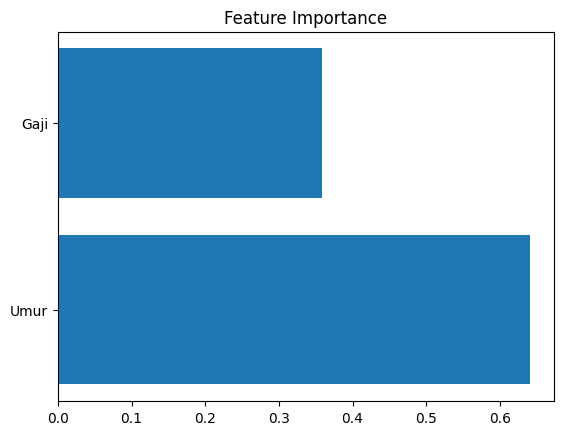

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import loguniform, randint
from collections import Counter

# 1. Load Data
try:
    data = pd.read_csv('iklan_sosmed.csv', delimiter=';')
    X = data.iloc[:, 2:-1].values  # Kolom Umur dan Gaji
    y = data.iloc[:, -1].values    # Kolom Transaksi
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=99
)

# 3. Normalisasi Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Cek Distribusi Kelas
print("\nDistribusi Kelas (Train):", Counter(y_train))
print("Distribusi Kelas (Test):", Counter(y_test))

# 5. Fungsi untuk Tuning Aman
def safe_randomized_search(X, y, model, params, n_iter=20):
    # Tentukan jumlah fold berdasarkan kelas minoritas
    min_samples = min(Counter(y).values())
    n_splits = min(5, min_samples) if min_samples >= 2 else 2

    cv_strategy = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=99)

    try:
        search = RandomizedSearchCV(
            model,
            param_distributions=params,
            n_iter=n_iter,
            cv=cv_strategy,
            scoring='accuracy',
            random_state=99,
            n_jobs=-1
        )
        search.fit(X, y)
        return search
    except Exception as e:
        print(f"Error during search: {e}")
        return None

# 6. Tuning Logistic Regression
print("\n=== Tuning Logistic Regression ===")
lr_params = {
    'C': loguniform(1e-4, 100),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 300, 500],
    'class_weight': [None, 'balanced']
}

lr_search = safe_randomized_search(X_train, y_train,
                                 LogisticRegression(random_state=99),
                                 lr_params)

if lr_search:
    print("Best Parameters:", lr_search.best_params_)
    print("Best CV Accuracy: {:.2f}%".format(lr_search.best_score_*100))

    y_pred = lr_search.best_estimator_.predict(X_test)
    print("\nTest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
else:
    print("Fallback to default Logistic Regression")
    lr = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=500)
    lr.fit(X_train, y_train)
    print("Test Accuracy: {:.2f}%".format(lr.score(X_test, y_test)*100))

# 7. Tuning Decision Tree
print("\n=== Tuning Decision Tree ===")
dt_params = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

dt_search = safe_randomized_search(X_train, y_train,
                                 DecisionTreeClassifier(random_state=99),
                                 dt_params)

if dt_search:
    print("Best Parameters:", dt_search.best_params_)
    print("Best CV Accuracy: {:.2f}%".format(dt_search.best_score_*100))

    y_pred = dt_search.best_estimator_.predict(X_test)
    print("\nTest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
else:
    print("Fallback to default Decision Tree")
    dt = DecisionTreeClassifier(max_depth=5, random_state=99)
    dt.fit(X_train, y_train)
    print("Test Accuracy: {:.2f}%".format(dt.score(X_test, y_test)*100))

# 8. Visualisasi Hasil (Opsional)
def plot_feature_importance(model, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        plt.barh(feature_names, importances)
        plt.title('Feature Importance')
        plt.show()

if 'dt_search' in locals() and dt_search:
    plot_feature_importance(dt_search.best_estimator_, ['Umur', 'Gaji'])